In [11]:
import sys
sys.path.append(r'Classification\titanic\model_xgboost')

In [12]:
import pandas as pd
import yaml
import os
import pickle
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

In [13]:
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic\model_xgboost\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

In [14]:
X_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_val'])   
    
y_val_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_val'])


X_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['X_train'])   
    
y_train_feat_sel = os.path.join(
        config['init_path'],
        config['feat_selection']['path'],
        config['feat_selection']['y_train'])
    
params_ = {
        'X_train_feat_sel': X_train_feat_sel,
        'y_train_feat_sel': y_train_feat_sel,
        'X_val_feat_sel': X_val_feat_sel,
        'y_val_feat_sel': y_val_feat_sel,
        'model': config['model']['path'],
        'save_plot': config['save_reports']['path_plot'],
        'removed_cols': config['save_reports']['path_reports'],
        }

In [15]:
X_train = pd.read_parquet(params_['X_train_feat_sel'])
y_train = pd.read_parquet(params_['y_train_feat_sel'])   

X_val = pd.read_parquet(params_['X_val_feat_sel'])
y_val = pd.read_parquet(params_['y_val_feat_sel'])       

In [16]:
model_path = os.path.join(
        config['init_path'],
        params_['model'],
        f"model_1.pkl")    
with open(model_path, "rb") as file:
            model = pickle.load(file)

In [17]:
X_val.drop(
    columns=config['model_selection']['cols_2_drop'], 
    inplace=True)

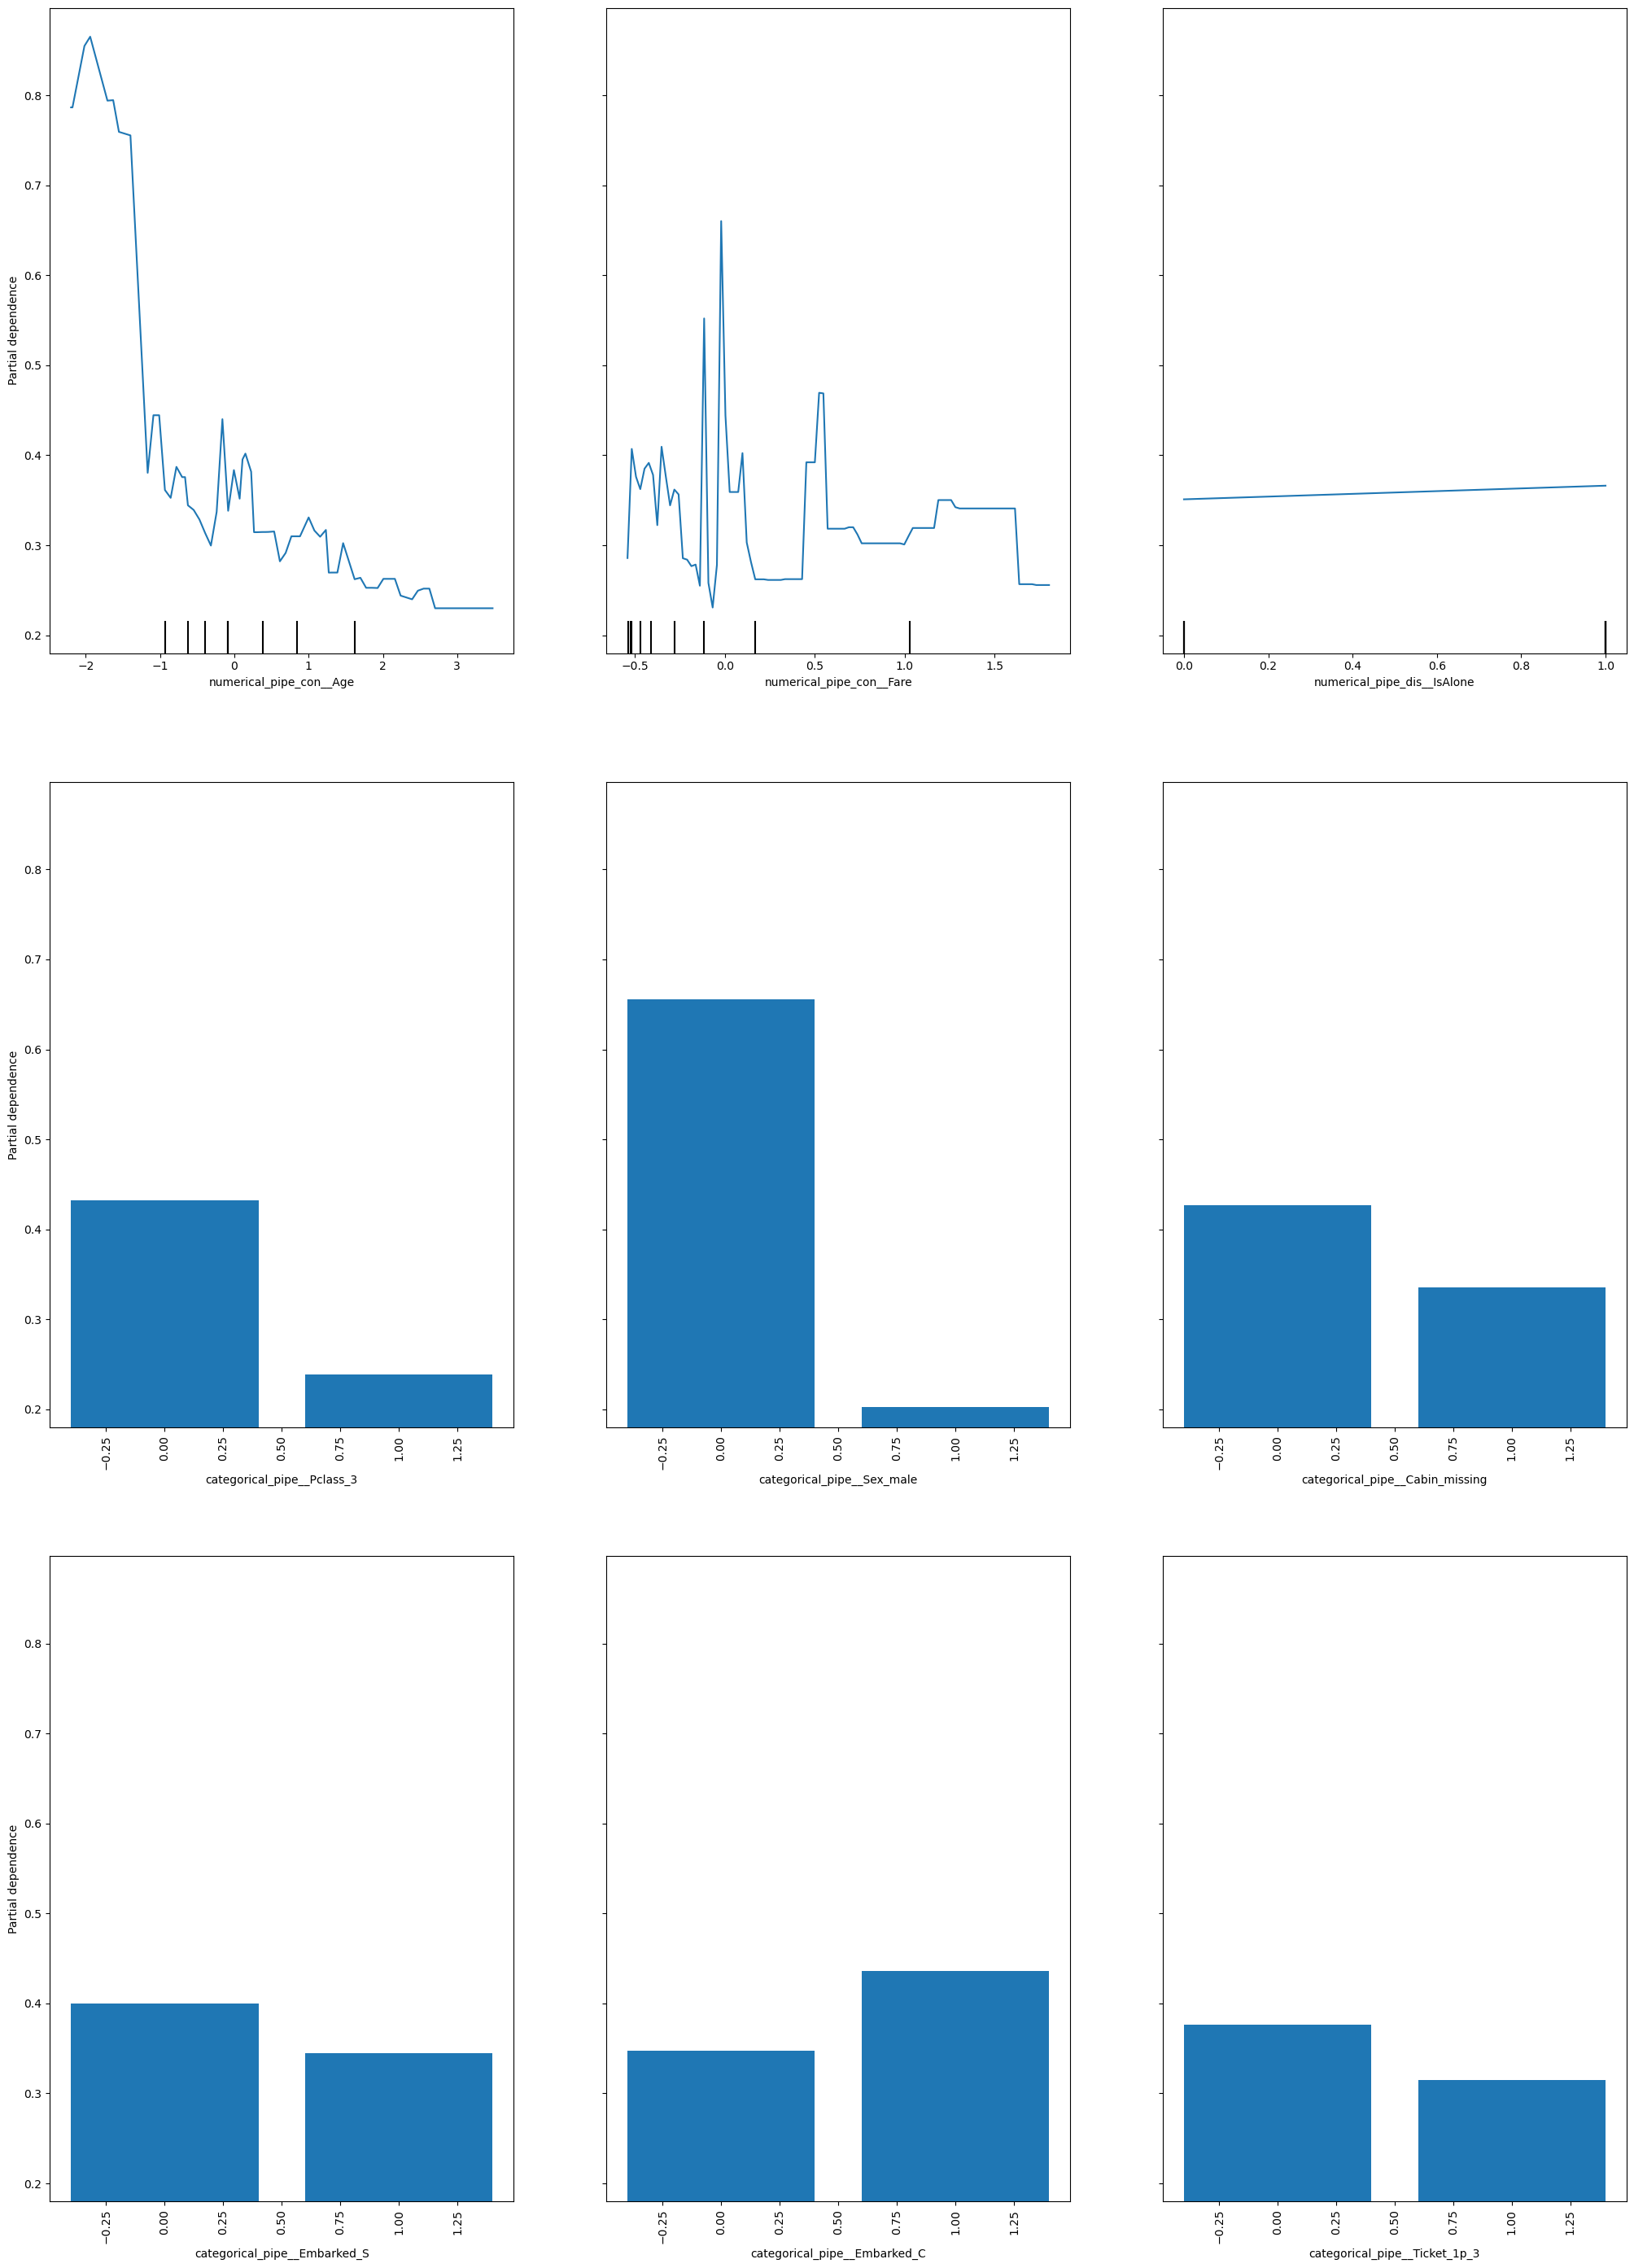

In [18]:
fig, ax = plt.subplots(figsize=(25, 35))
PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_val,
        features = X_val.columns.tolist(),
        categorical_features=X_val.columns[X_val.columns.str.contains('categorical_pipe')],
        random_state=23,
        ax=ax

    )

# Shap Values

In [26]:
clf = model.named_steps['xgbclassifier']

In [27]:
explainer = shap.TreeExplainer(clf, X_train, model_output="probability")

In [29]:
shap_values_val = explainer(X_val)

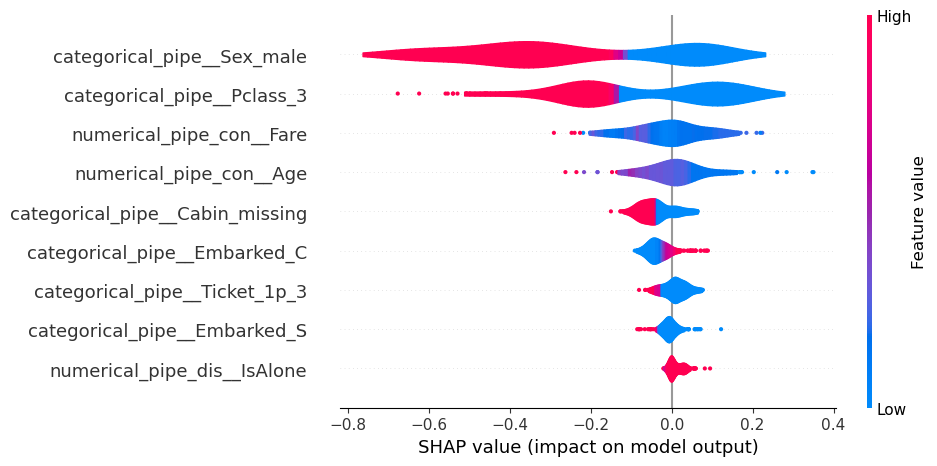

In [32]:
shap.plots.violin(shap_values_val)

In [33]:
X_val.columns

Index(['numerical_pipe_con__Age', 'numerical_pipe_con__Fare',
       'numerical_pipe_dis__IsAlone', 'categorical_pipe__Pclass_3',
       'categorical_pipe__Sex_male', 'categorical_pipe__Cabin_missing',
       'categorical_pipe__Embarked_S', 'categorical_pipe__Embarked_C',
       'categorical_pipe__Ticket_1p_3'],
      dtype='object')

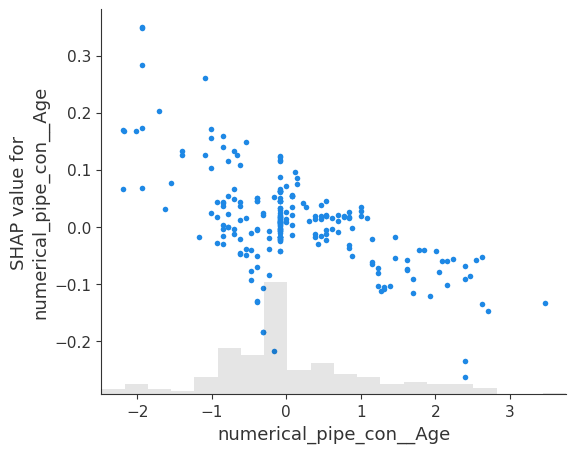

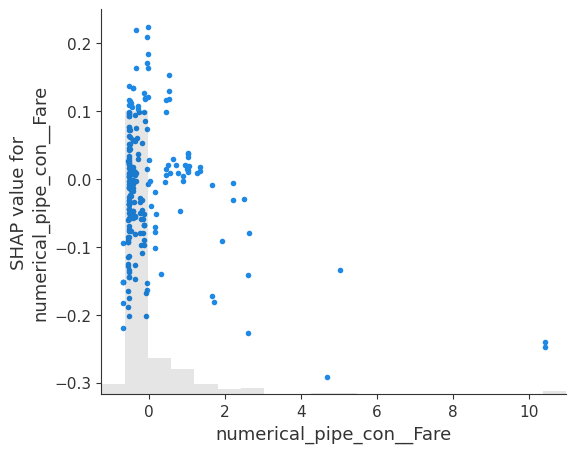

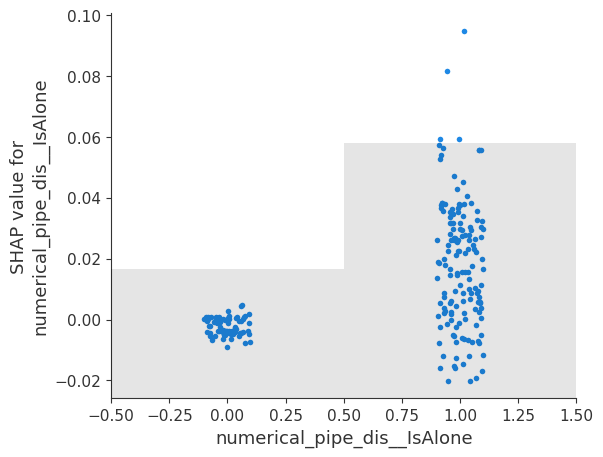

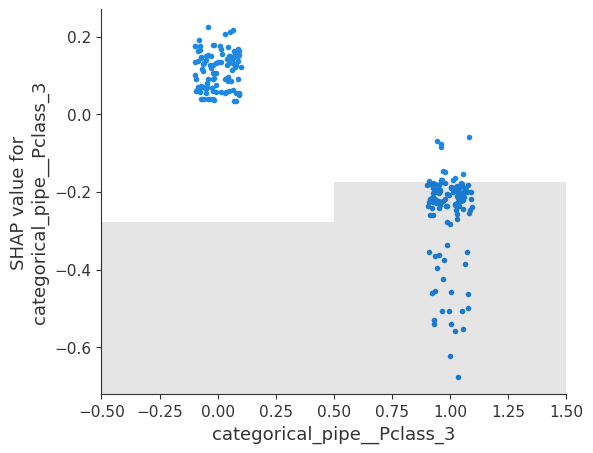

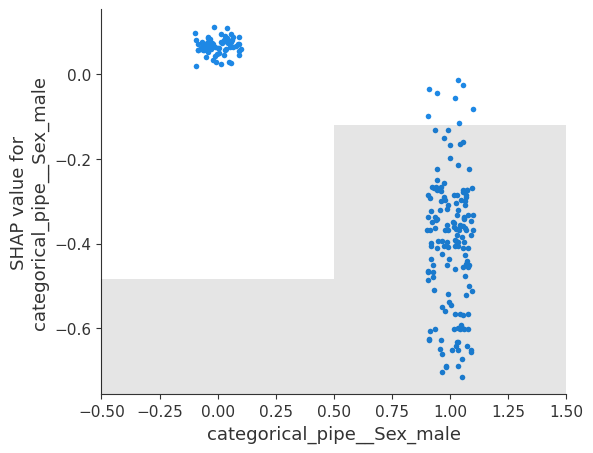

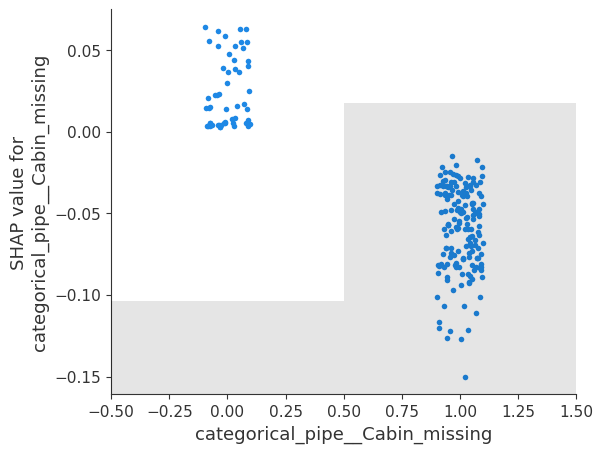

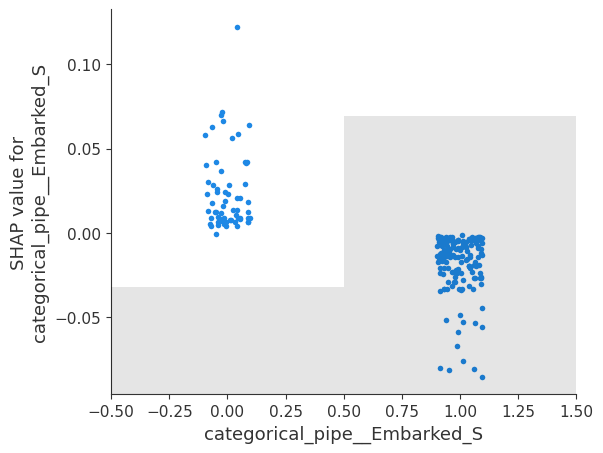

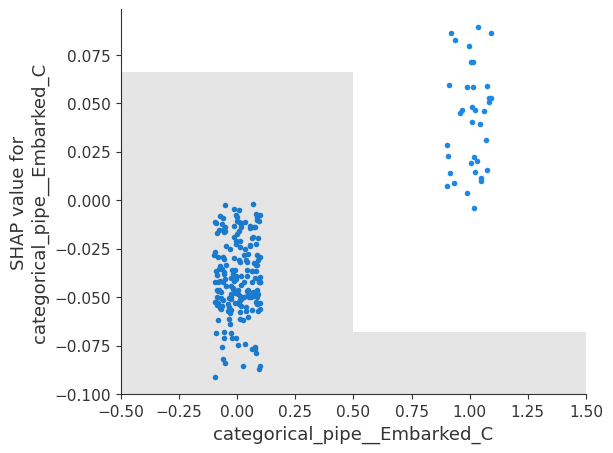

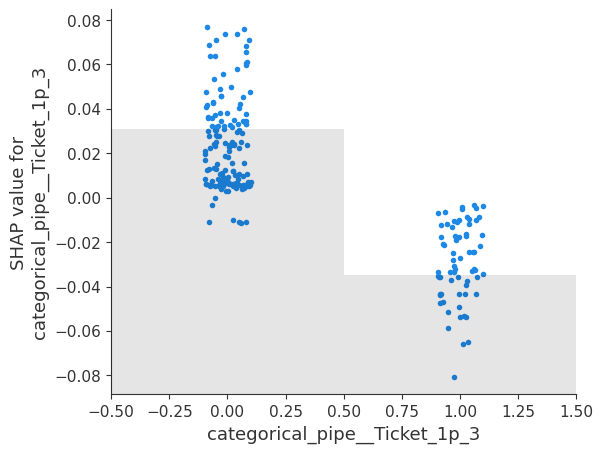

In [35]:
for col in X_val.columns:

    shap.plots.scatter(shap_values_val[:, col])

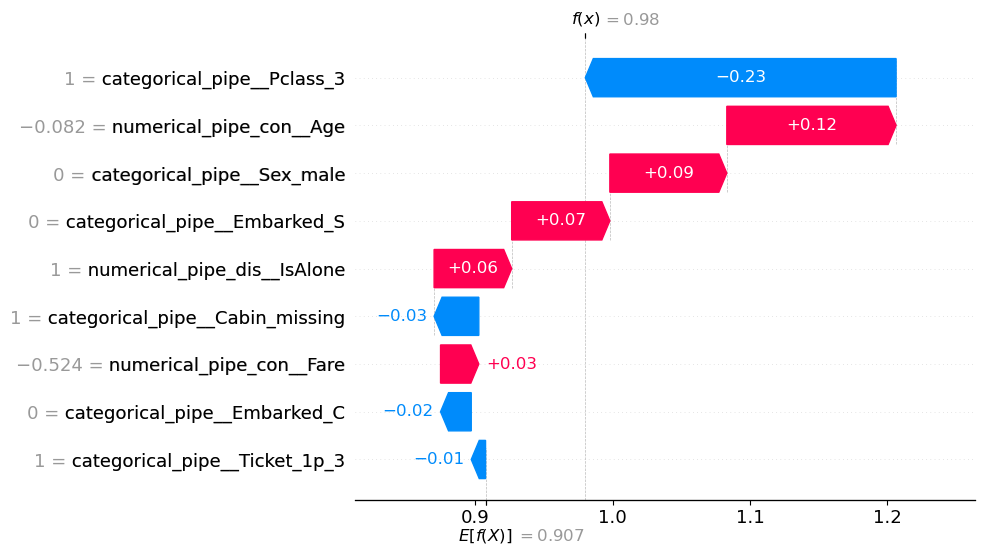

In [37]:
shap.plots.waterfall(shap_values_val[0])